#SARIMA SALES DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:/Users/soori/Desktop/face class/Data sci-Projects/project 4 time series/time_series_revenue.csv")

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   Month                                                   105 non-null    object
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [5]:
df.columns=['Date','Sales']
df.head()

,Date,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    105 non-null    datetime64[ns]
 1   Sales   105 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [8]:
df.set_index('Date',inplace=True)

In [9]:
df.head()

,Sales
Date,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


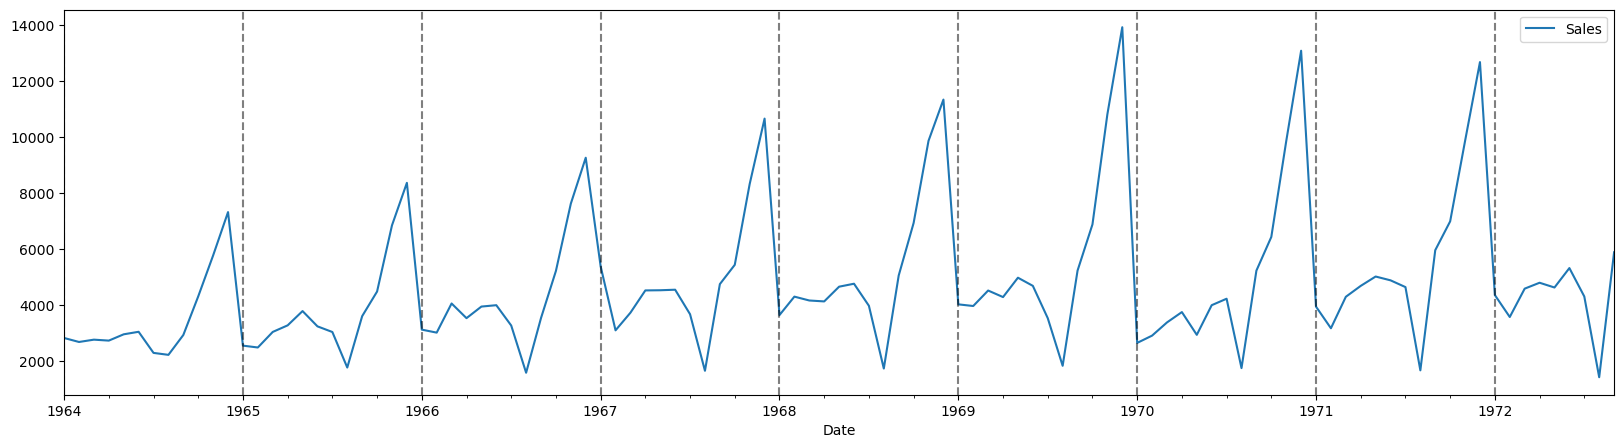

In [10]:
#plot
df.plot(figsize=(20,5))
for year in range(1964,1973):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--',alpha=0.5)

In [11]:
df.isna().sum()

Sales    0
dtype: int64

#Decomposition

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

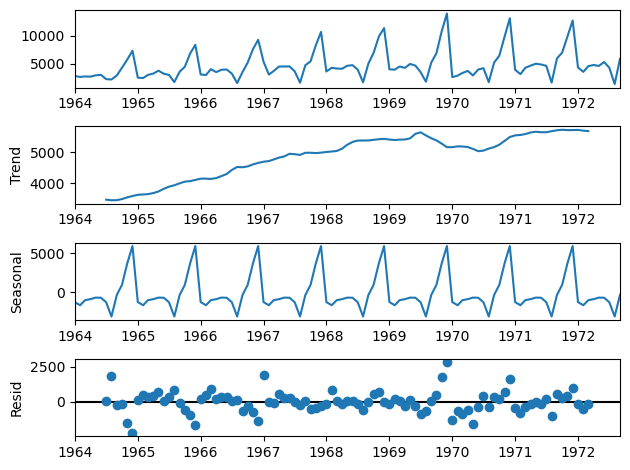

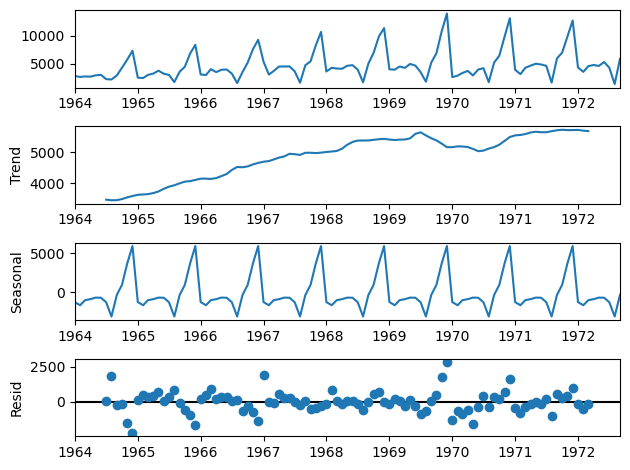

In [13]:
seasonal_decompose(df).plot()

ADF TEST

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
    result=adfuller(series)
    print('p value:{}'.format(result[1]))
    if result[1]<= 0.05:
        print('Data is stationary')
    else:
        print('Data is not stationary') 
adf_test(df['Sales'])

p value:0.3639157716602417
Data is not stationary


#Seasonal Differencing to make data stationary

In [16]:
df['Sales']-df['Sales'].shift(12)

Date
1964-01-01      NaN
1964-02-01      NaN
1964-03-01      NaN
1964-04-01      NaN
1964-05-01      NaN
              ...  
1972-05-01   -392.0
1972-06-01    438.0
1972-07-01   -335.0
1972-08-01   -246.0
1972-09-01    -74.0
Name: Sales, Length: 105, dtype: float64

In [17]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [18]:
df.head(14)

,Sales,Seasonal First Difference
Date,,
1964-01-01,2815,NaN
1964-02-01,2672,NaN
1964-03-01,2755,NaN
1964-04-01,2721,NaN
1964-05-01,2946,NaN
1964-06-01,3036,NaN
1964-07-01,2282,NaN
1964-08-01,2212,NaN
1964-09-01,2922,NaN


In [19]:
adf_test(df['Seasonal First Difference'].dropna())

p value:2.060579696813685e-11
Data is stationary


d=1

<AxesSubplot:xlabel='Date'>

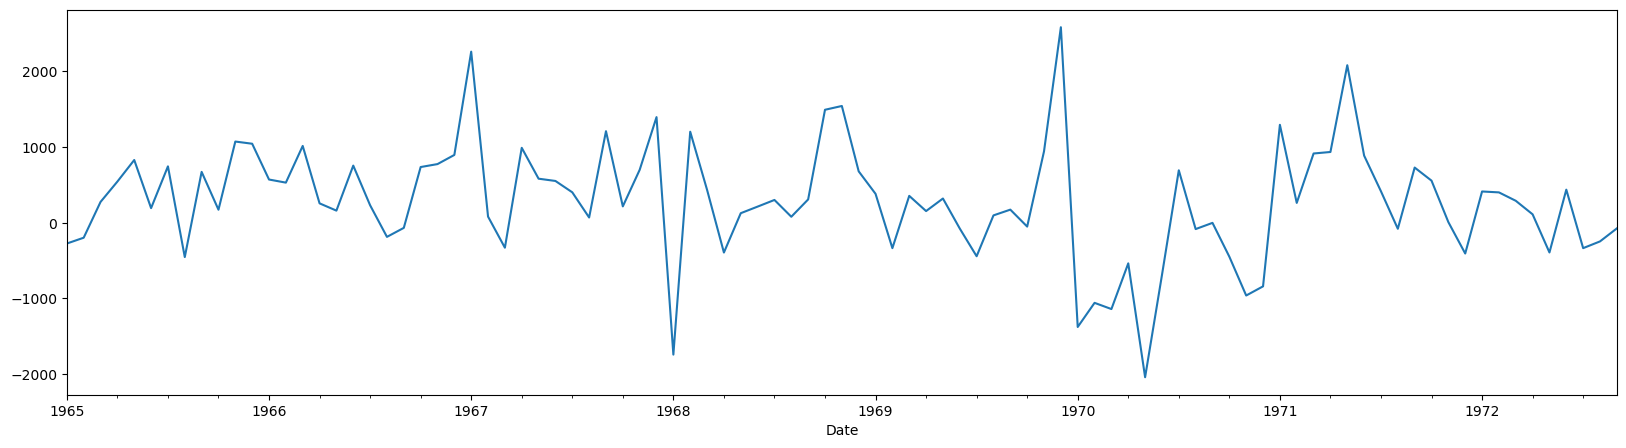

In [20]:
df['Seasonal First Difference'].dropna().plot(figsize=(20,5))

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

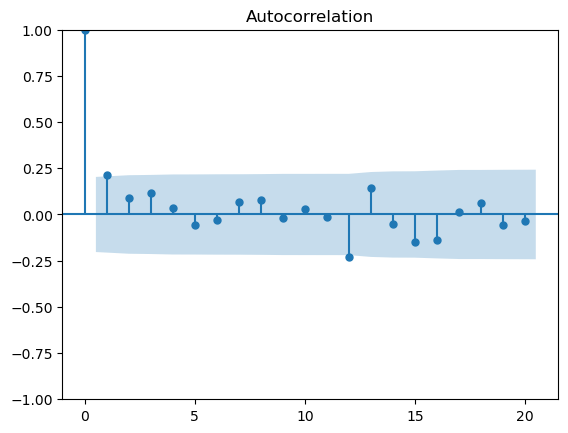

In [22]:
acf_plot=plot_acf(df['Seasonal First Difference'].dropna())

C:\Users\soori\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


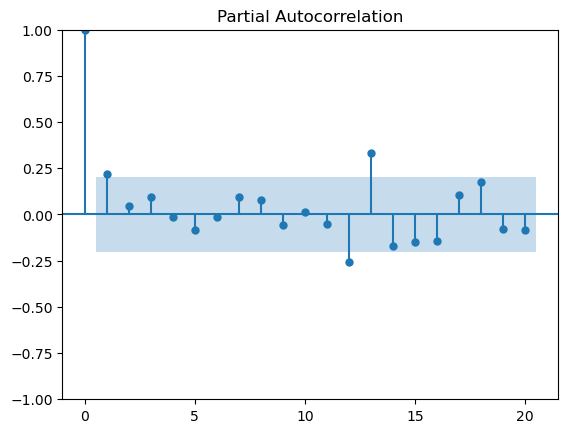

In [23]:
pacf_plot=plot_pacf(df['Seasonal First Difference'].dropna())

p=1,11,12

# SARIMA

In [25]:
model=SARIMAX(df['Sales'],order=(1,1,11),seasonal_order=(1,1,11,12))
results=model.fit()

C:\Users\soori\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\soori\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\soori\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\soori\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [27]:
results.predict()


1964-01-01       0.000000
1964-02-01    2452.142662
1964-03-01    2453.546666
1964-04-01    2706.247099
1964-05-01    2722.585018
                 ...     
1972-05-01    4802.469235
1972-06-01    4916.745451
1972-07-01    4738.714007
1972-08-01    1684.290217
1972-09-01    6153.656755
Freq: MS, Name: predicted_mean, Length: 105, dtype: float64

In [28]:
#PRedict the values
df['forecast']=results.predict()

In [29]:
df.head()

,Sales,Seasonal First Difference,forecast
Date,,,
1964-01-01,2815,NaN,0.000000
1964-02-01,2672,NaN,2452.142662
1964-03-01,2755,NaN,2453.546666
1964-04-01,2721,NaN,2706.247099
1964-05-01,2946,NaN,2722.585018


<AxesSubplot:xlabel='Date'>

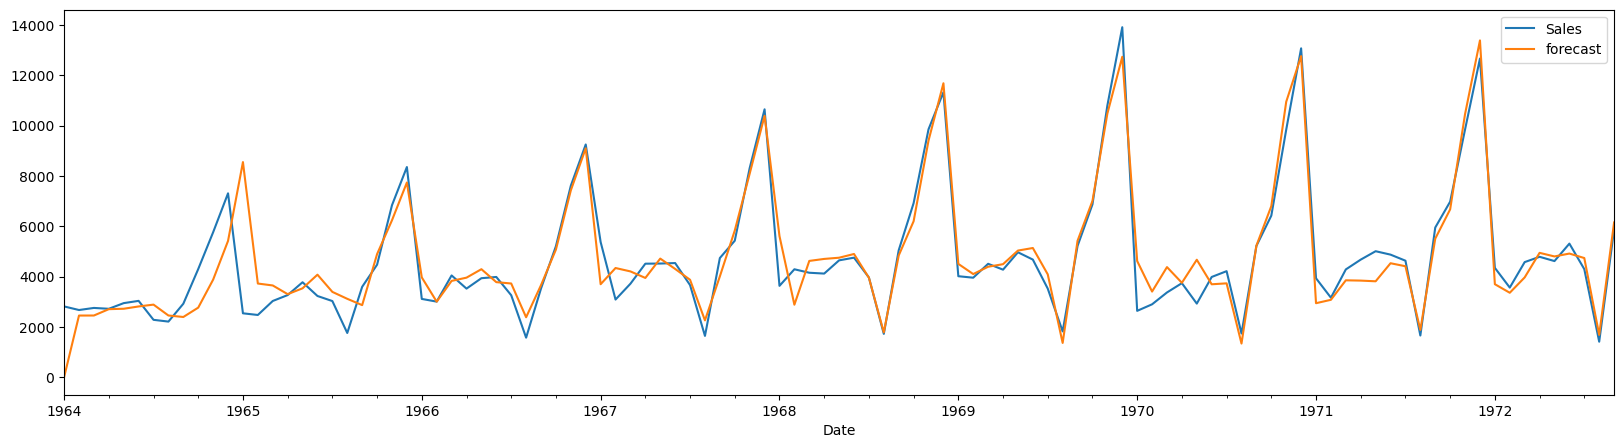

In [31]:
df[['Sales','forecast']].plot(figsize=(20,5))

In [32]:
df.tail()

,Sales,Seasonal First Difference,forecast
Date,,,
1972-05-01,4618,-392.0,4802.469235
1972-06-01,5312,438.0,4916.745451
1972-07-01,4298,-335.0,4738.714007
1972-08-01,1413,-246.0,1684.290217
1972-09-01,5877,-74.0,6153.656755


In [34]:
df.shape

(105, 3)

In [37]:
#predicting future sales
from pandas.tseries.offsets import DateOffset

In [39]:
[df.index[-1]+DateOffset(months=x)for x in range (1,25)]

[Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00'),
 Timestamp('1974-09-01 00:00:00')]

In [40]:
future_dates=[df.index[-1]+DateOffset(months=x)for x in range (1,25)]

In [51]:
df=df.append(pd.DataFrame(index=future_dates,columns=df.columns))

C:\Users\soori\AppData\Local\Temp\ipykernel_34764\2863014490.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(pd.DataFrame(index=future_dates,columns=df.columns))


In [42]:
df

,Sales,Seasonal First Difference,forecast
1964-01-01,2815,NaN,0.000000
1964-02-01,2672,NaN,2452.142662
1964-03-01,2755,NaN,2453.546666
1964-04-01,2721,NaN,2706.247099
1964-05-01,2946,NaN,2722.585018
...,...,...,...
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


In [55]:
df['forecast']=results.predict(start='1972-10-01',end='1974-08-01')

In [56]:
df.tail()

,Sales,Seasonal First Difference,forecast
1974-05-01,NaN,NaN,4518.711540
1974-06-01,NaN,NaN,5148.791075
1974-07-01,NaN,NaN,4454.732817
1974-08-01,NaN,NaN,1579.586244
1974-09-01,NaN,NaN,NaN


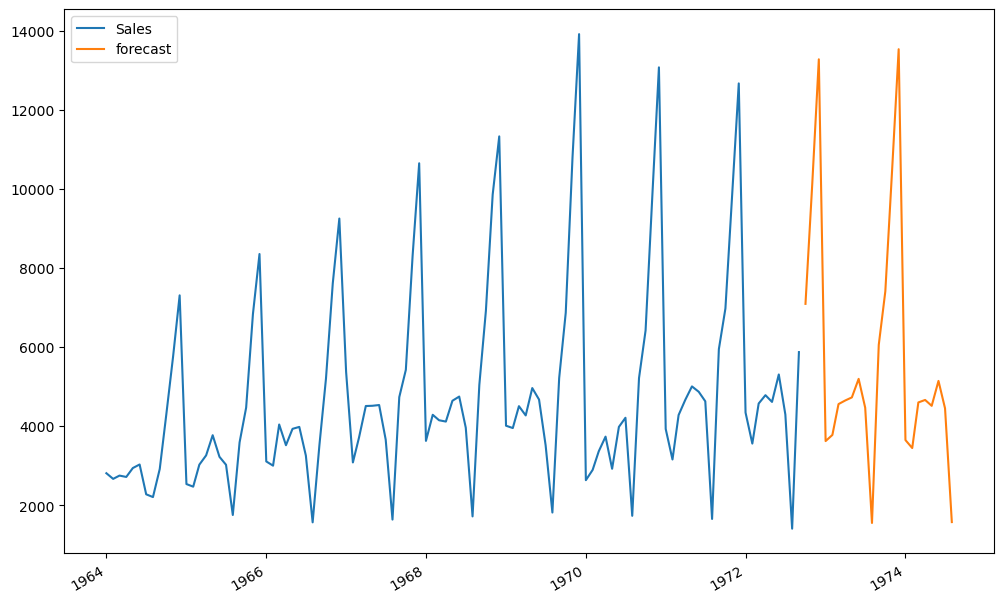

In [57]:
#plot
df[['Sales','forecast']].plot(figsize=(12,8))
plt.show()